In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
%matplotlib inline

In [18]:
df=pd.read_csv('911.csv')

In [19]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [20]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.2 MB


# Top 5 zipcodes for 911 calls?


In [21]:
top5_zip=df.groupby('zip').agg({'zip':'count'}).rename(columns={'zip':'Count'}).sort_values('Count',ascending=False).head()
top5_zip

,Count
zip,
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


# Top 5 townships for 911 calls?

In [22]:
top5_twp=df.groupby('twp').agg({'twp':'count'}).rename(columns={'twp':'Count'}).sort_values('Count',ascending=False).head()
top5_twp

,Count
twp,
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


In [23]:
df['title'].nunique()

110

In [24]:
top5_title=df.groupby('title').agg({'title':'count'}).rename(columns={'title':'Count'}).sort_values('Count'
                                                                                                    ,ascending=False).head()
top5_title

,Count
title,
Traffic: VEHICLE ACCIDENT -,23066
Traffic: DISABLED VEHICLE -,7702
Fire: FIRE ALARM,5496
EMS: RESPIRATORY EMERGENCY,5112
EMS: CARDIAC EMERGENCY,5012


In [25]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [27]:
top_reason=df.groupby('Reason').agg({'Reason':'count'}).rename(columns={'Reason':'Count'}).sort_values('Count',ascending=False).reset_index()
top_reason

,Reason,Count
0,EMS,48877
1,Traffic,35695
2,Fire,14920


# Count of 911 calls by Reasons

In [28]:
Reason=top_reason['Reason']
Count=top_reason['Count']
px.bar(top_reason,y=Count,x=Reason)  

In [29]:
df['TimeStamp']=pd.to_datetime(df['timeStamp'])

In [30]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,TimeStamp
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01
...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,2016-08-24 11:06:00
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,2016-08-24 11:07:02
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,2016-08-24 11:12:00
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,2016-08-24 11:17:01


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  object        
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
 10  TimeStamp  99492 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 8.3+ MB


In [32]:

df['Hour']=df['TimeStamp'].apply(lambda time: time.hour)
df['Month']=df['TimeStamp'].apply(lambda time: time.month)
df['Day of the Week']=df['TimeStamp'].apply(lambda time: time.dayofweek)

In [33]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of the Week']=df['Day of the Week'].map(dmap)

In [34]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,TimeStamp,Hour,Month,Day of the Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,2016-08-24 11:06:00,11,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,2016-08-24 11:07:02,11,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,2016-08-24 11:12:00,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,2016-08-24 11:17:01,11,8,Wed


# Count of 911 calls based on Weekday by Reasons

In [37]:
reason_day=pd.DataFrame(df.groupby(['Day of the Week','Reason'])['Reason'].count()).rename(columns={'Reason':'Count'}).reset_index()
dayofweek=reason_day['Day of the Week']
Count=reason_day['Count']
Reason=reason_day['Reason']
reason_day
px.histogram(reason_day,x=dayofweek,y=Count,color=Reason,barmode='group',
             category_orders={'Day of the Week':['Mon','Tue','Wed','Thu','Fri','Sat','Sun']})

In [57]:
reason_month=pd.DataFrame(df.groupby(['Month','Reason'])['Reason'].count()).rename(columns={'Reason':'Count'}).reset_index()
month=reason_month['Month']
Count=reason_month['Count']
Reason=reason_month['Reason']
bins=range(0,12,1)
reason_month
px.histogram(reason_day,x=month,y=Count,color=Reason,barmode='group')


# Count of 911 calls based on Weekday by Reasons

<AxesSubplot:xlabel='Month', ylabel='count'>

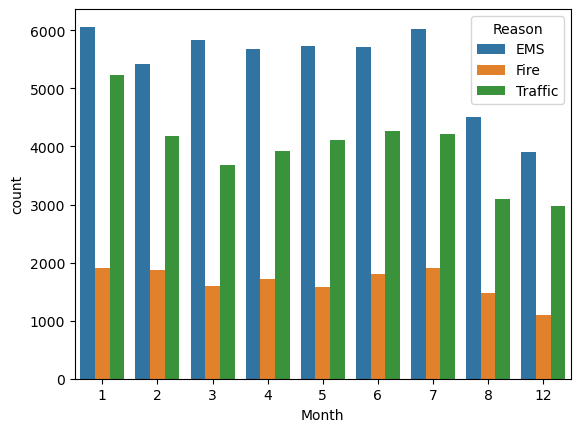

In [66]:
reason_month=pd.DataFrame(df.groupby(['Month','Reason'])['Reason'].count()).rename(columns={'Reason':'Count'}).reset_index()
month=reason_month['Month']
Count=reason_month['Count']
Reason=reason_month['Reason']
reason_month
sns.countplot(data=df,x='Month',hue='Reason')

In [72]:
bymonth=df.groupby('Month').count().reset_index()
bymonth

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,TimeStamp,Hour,Day of the Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


# LinePlot of 911 calls by every month

In [90]:
month=bymonth['Month']
twp=bymonth['twp']
px.line(bymonth,x='Month',y='twp',labels={'month':'Month','twp':'Count of calls'})

# lmplot of 911 calls by month

In [78]:
month=bymonth['Month']
twp=bymonth['twp']
px.scatter(bymonth,x='Month',y='twp',labels={'month':'Month','twp':'Count of calls'},trendline='ols')

In [79]:
df['Date']=df['TimeStamp'].apply(lambda x: x.date())

In [80]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,TimeStamp,Hour,Month,Day of the Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,2016-08-24 11:06:00,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,2016-08-24 11:07:02,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,2016-08-24 11:12:00,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,2016-08-24 11:17:01,11,8,Wed,2016-08-24


In [85]:
bydate=df.groupby('Date').count().reset_index()

In [86]:
bydate

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,TimeStamp,Hour,Month,Day of the Week
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328
255,2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357
256,2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389
257,2016-08-23,439,439,439,390,439,439,439,437,439,439,439,439,439,439


# Number of calls by each Date

In [89]:
date=bydate['Date']
twp=bydate['twp']
px.line(bydate,x='Date',y='twp',labels={'date':'Date','twp':'Count of calls'})

In [93]:
bydate_ems=df[df['Reason']=='EMS'].groupby('Date').count().reset_index()
bydate_traffic=df[df['Reason']=='Traffic'].groupby('Date').count().reset_index()
bydate_fire=df[df['Reason']=='Fire'].groupby('Date').count().reset_index()

# Number of calls by each date for EMS

In [95]:
date=bydate_ems['Date']
twp=bydate_ems['twp']
px.line(bydate_ems,x='Date',y='twp',labels={'date':'Date','twp':'Count of calls'},title='EMS')

# Number of calls by each date for Fire

In [96]:
date=bydate_fire['Date']
twp=bydate_fire['twp']
px.line(bydate_fire,x='Date',y='twp',labels={'date':'Date','twp':'Count of calls'},title='Fire')

# Number of calls by each date for Traffic

In [97]:
date=bydate_traffic['Date']
twp=bydate_traffic['twp']
px.line(bydate_traffic,x='Date',y='twp',labels={'date':'Date','twp':'Count of calls'},title='Traffic')

In [105]:
hour_dayweek=df.groupby(['Day of the Week','Hour'])['Reason'].count().unstack()

# Heatmap of Day of the week and Hour

<AxesSubplot:xlabel='Hour', ylabel='Day of the Week'>

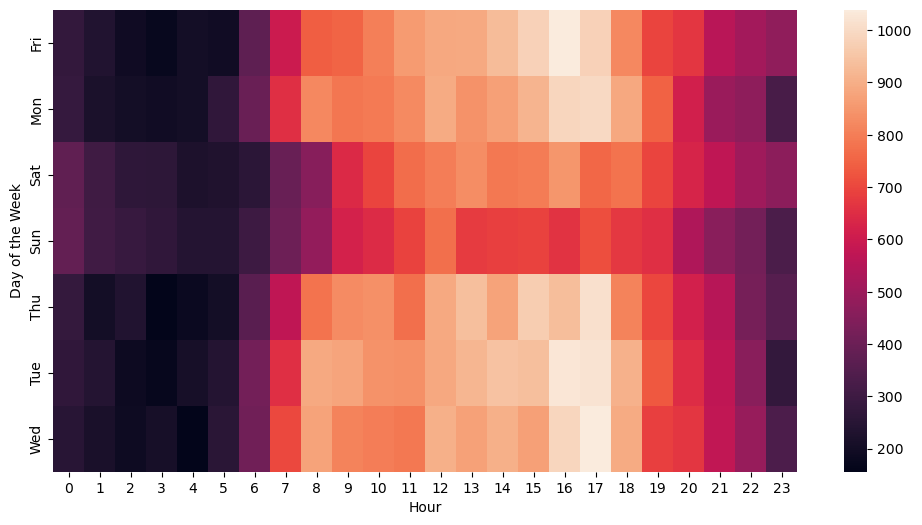

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(hour_dayweek)

# Clustermap of Day of the week and Hour

<Figure size 1000x500 with 0 Axes>

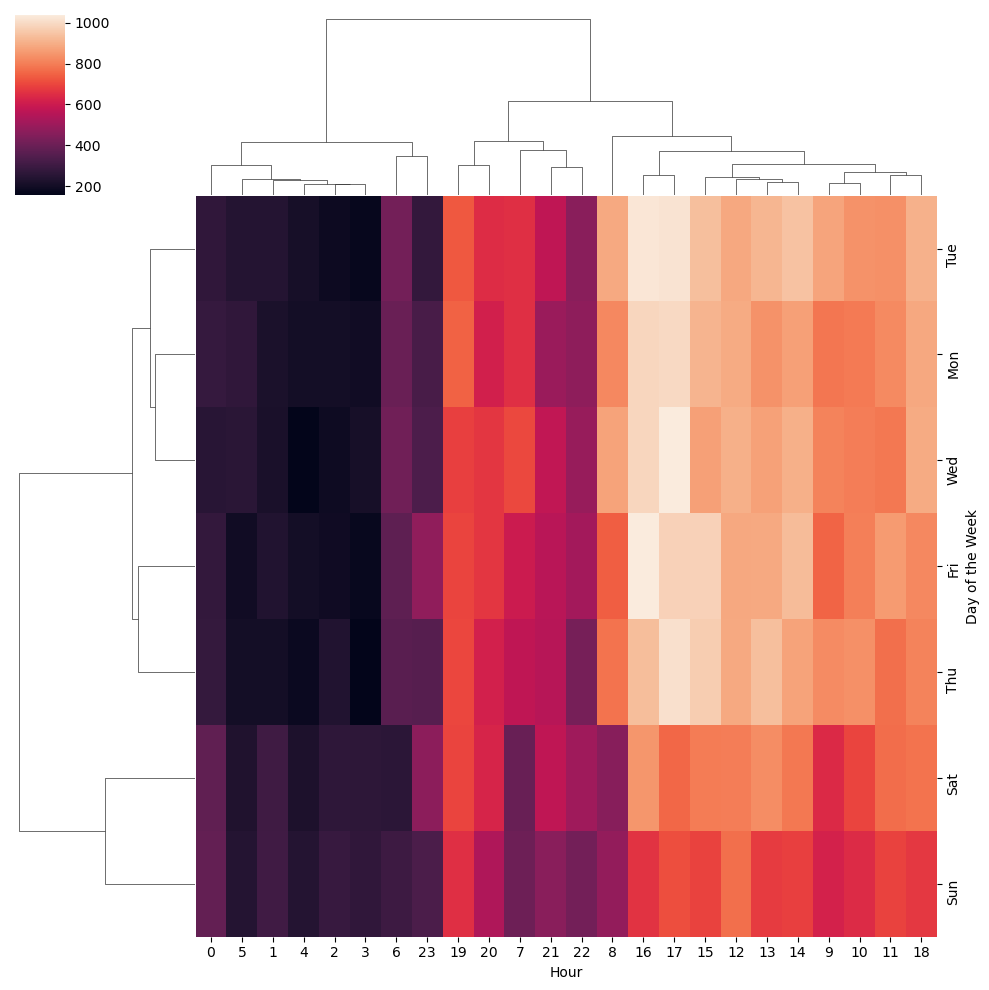

In [109]:
plt.figure(figsize=(10,5))
sns.clustermap(hour_dayweek)

In [114]:
bymonth_weekday=df.groupby(['Day of the Week','Month'])['Reason'].count().unstack()
bymonth_weekday

Month,1,2,3,4,5,6,7,8,12
Day of the Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


# Heatmap of Day of the week and Month

<AxesSubplot:xlabel='Month', ylabel='Day of the Week'>

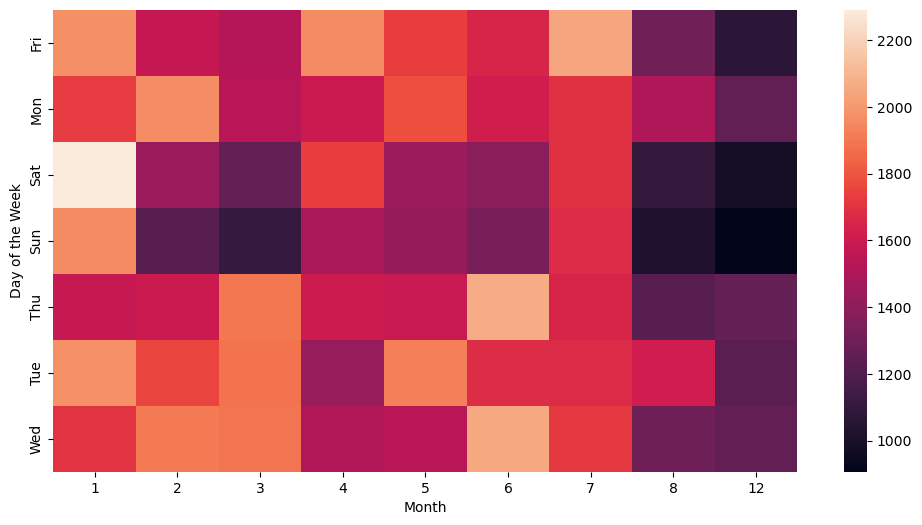

In [115]:
plt.figure(figsize=(12,6))
sns.heatmap(bymonth_weekday)

## Clustermap of Day of the week and Month

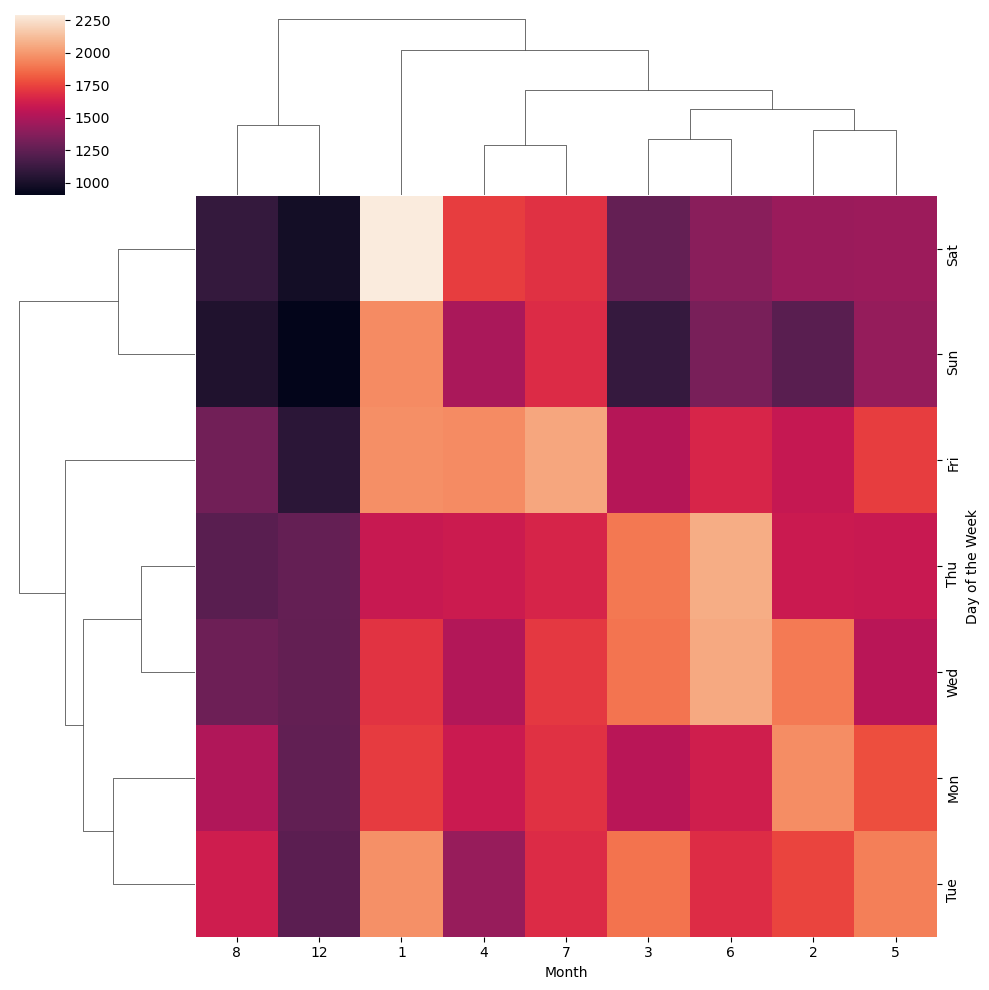

In [116]:
sns.clustermap(bymonth_weekday)